<a href="https://colab.research.google.com/github/dscoool/machinelearning11/blob/main/3_diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류란?

*   지도학습 종류 중 하나
*   어떤 데이터가 주어졌을 때 그 데이터가 어떤 **범주**(클래스)에 속하는지를 알아내는 문제

*   정해진 답에서 고른다는 점에서 객관식 시험 문제를 푸는 것과 비슷하다

*   분류의 종류
   -  범주 두 개로 구분하는 **이항 분류**(binary classification)
   -  세 개 이상으로 구분하는 **다항 분류**(multi class classification)

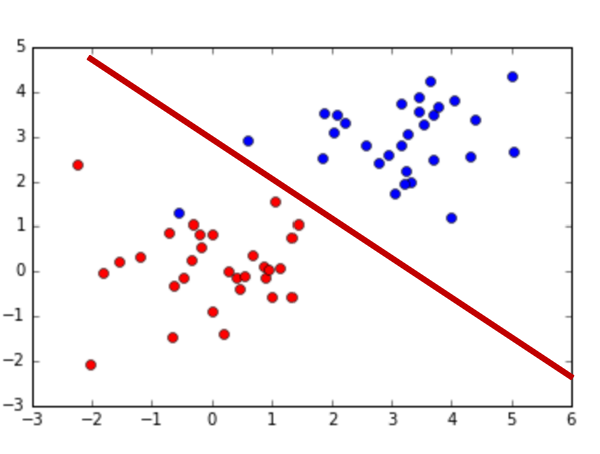

# 로지스틱 회귀(Logistic Regression)란?
 - 선형회귀 알고리즘으로 만든 **분류 알고리즘**
 - 데이터가 어떤 범주에 속할 **확률(0~1)**을 예측하고 그 값에 따라 **가능성이 더 높은 범주**에 속하는 것으로 **분류**
 -  0과 1사이의 값으로 나타내기 위해 **시그모이드**(sigmoid) 함수를 사용
 - **X에 대하여 가장 연관성이 높은 Y값(범주)을
예측한다**
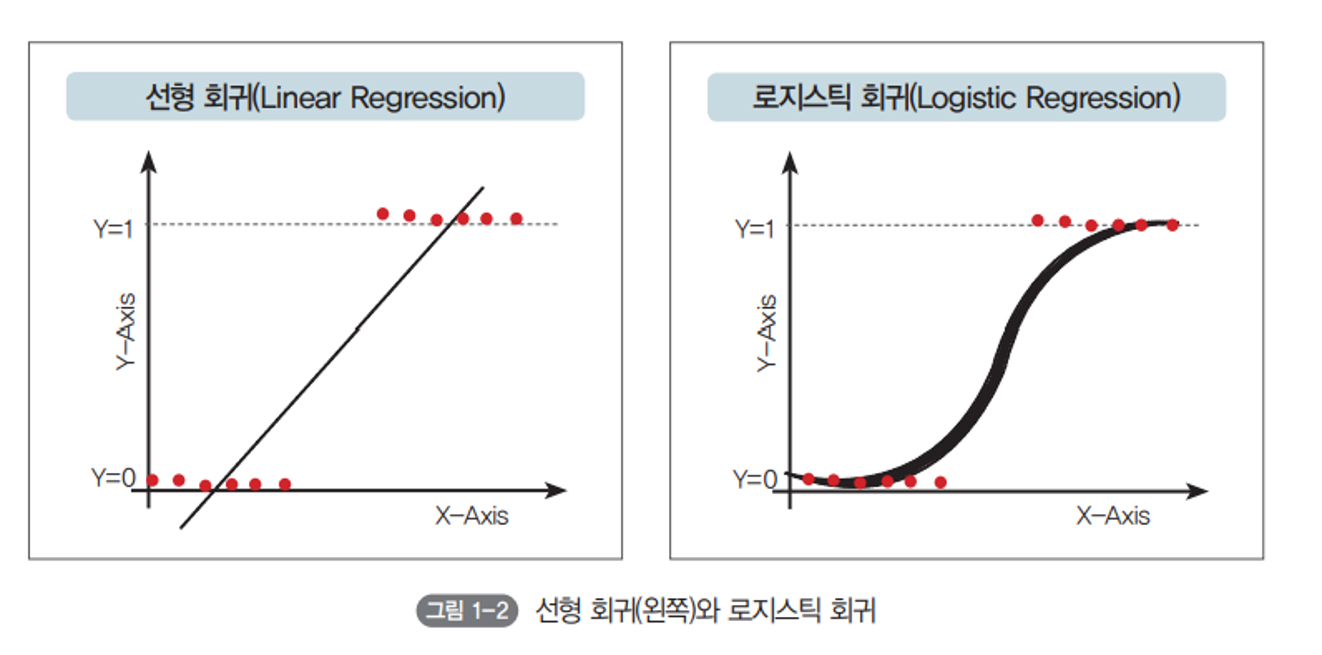






# 3. 당뇨 데이터로 초기 당뇨 진단하기
 - 새로 당뇨병에 걸렸거나 당뇨병 환자로 보이는 징후 및 증상 데이터를 가지고 당뇨 여부를 판단해보자
 - Diabetes Dataset : 2020년 520명의 15개 속성과 1개의 클래스를 나타냄
 - 속성(feature)는 15개
   - Gender: 성별/1은 남자, 2는 여자
   - Polyuria : 다뇨증/ 1은 예, 0은 아니오
   - Polydipsia : 조갈증
   - sudden weight loss : 갑작스러운 체중 감소
   - weakness : 기저질환
   - Polyphagia : 다식증
   - Genital thrush : 생식기 염증
   - visual blurring : 시각적 흐릿함
   - Itching : 가려움
   - Irritability : 과민성
   - delayed healing : 지연된 치유
   - partial paresis : 부분 마비
   - muscle stiffness : 근육 긴장도
   - Alopecia : 탈모
   - Obesity : 비만
 - 클래스(class)는 1개
   - 1은 당뇨 양성, 0은 당뇨 음성

 - 참고자료(UCI저장소)
   - https://archive-beta.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset


In [1]:
#0. 초기 설정
# 머신러닝 모델을 만들기 전에 필요한 설정
# 데이터 처리를 위한 Numpy, pandas, Matplotlib을 불러온다
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1)데이터 불러오기
- 당뇨병 징후 및 증상과 관련한 데이터를 불러오기
- 판다스의 csv 파일을 불러오는 read_csv() 함수를 통해 불러와 변수(df)에 저장
- 데이터 불러오기가 잘 되었는지 확인해보자
        -> 520명의 16가지 정보가 담겨져 있음.(속성 15개, 클래스 1개)

In [2]:
#1. 데이터셋 불러오기(diabetes_data).csv)
# read_csv() 함수를 통해 불러와 변수(df)에 저장

url = 'https://drive.google.com/uc?export=download&id=1zs-H7slk3aAkGNsg7TFxK2sS7OjHxeku'
df = pd.read_csv(url)
print(df.shape)
df.head()

(520, 16)


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# 2)데이터 상관관계 분석하기
**<히트맵(Heat map)>**
 - 데이터의 값을 **색깔로 표현**하여 시각적으로 분석하는 데이터 시각화 기법
 - 보통 데이터 값이 높거나, 양이 많을 경우 진한 색을 , 낮거나 적은 경우 연한 색을 사용
 - 시본(seaborn, 파이선의 시각화 라이브러리) 모듈을 활용
  - 참고자료 :  http://seaborn.pydata.org/

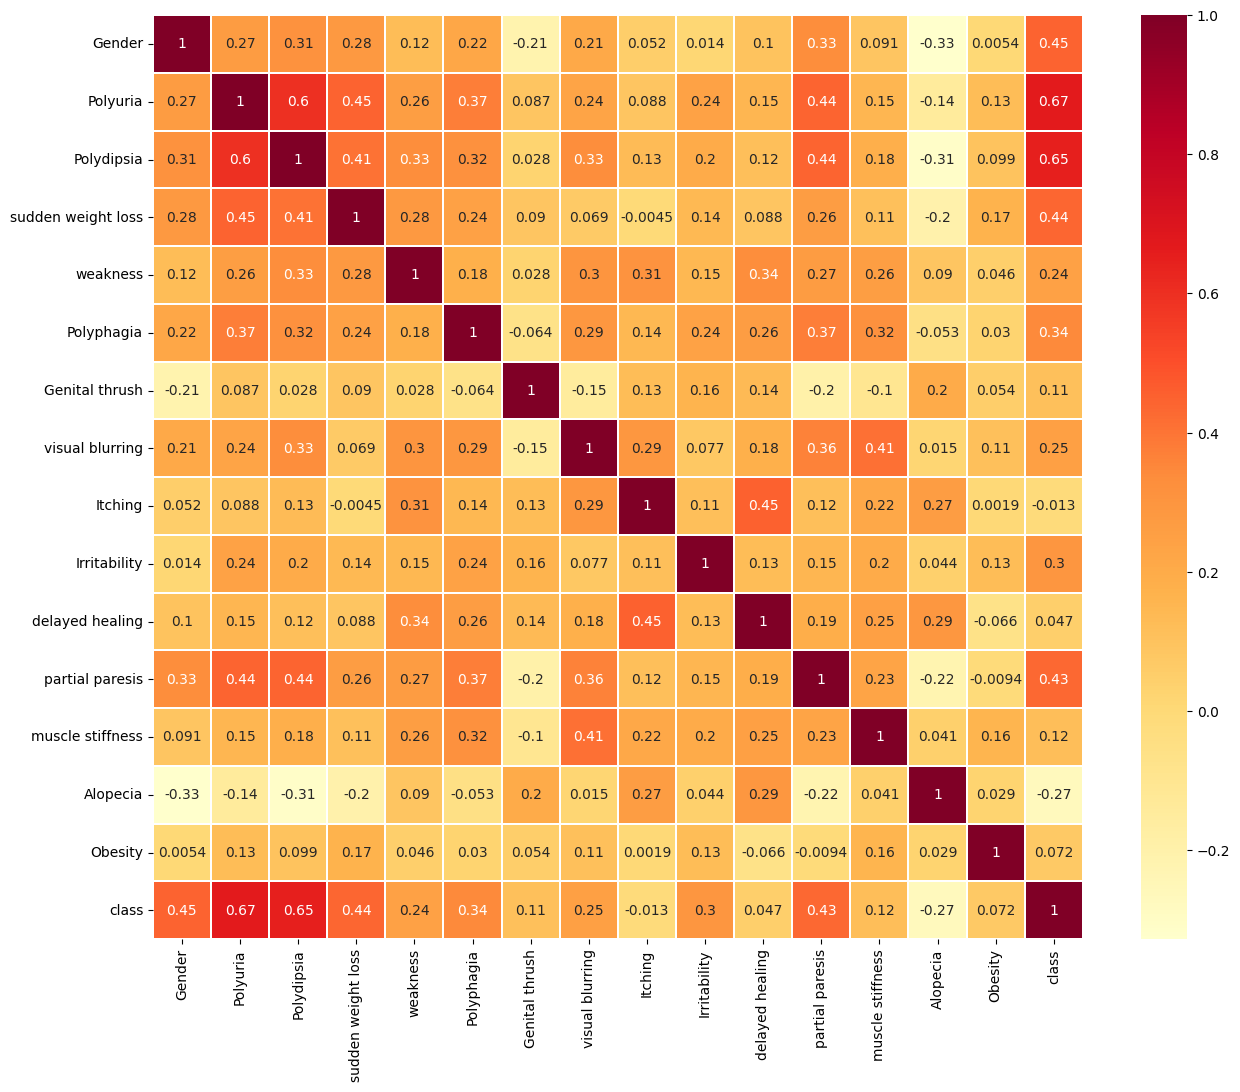

In [3]:
# 히트맵
import seaborn as sns

plt.figure(figsize=(15,12)) #표 사이즈 설정
sns.heatmap(df.corr(), linewidth=0.1, vmax=1, cmap=plt.cm.YlOrRd, linecolor='white', annot=True)
plt.show()

# QUIZ
- 당뇨 발병 여부와 가장 연관이 있는 속성 두가지는 ?
  - 정답 : (     빈칸     ), (        빈칸         )


# 3)데이터 전처리하기
 - 함수를 사용하지 않고 직접 학습 데이터와 테스트 데이터를 구분 할 수 있다
        -> 70%를 학습 데이터로, 30%를 테스트 데이터로 나누기
        -> 변수(lim)에 데이터의 70% 지점을 정수로 저장
- iloc(integer location) : 데이터 프레임의 행이나 컬럼의 순서를 정수 값으로 추출하는 기능


In [4]:
#3. 데이터 전처리
#데이터 및 레이블 분리하기
lim = int(len(df)*0.7)
train_x = df.iloc[0:lim,0:15].to_numpy()
test_x =  df.iloc[lim: ,0:15].to_numpy()
train_y = df.iloc[:lim,15].to_numpy()
test_y = df.iloc[lim:,15].to_numpy() #-1도 됌

In [5]:
#분리 결과 확인하기
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((364, 15), (364,), (156, 15), (156,))

# 4) 기계학습 - 지도학습 - 분류(이항분류)

 - 로지스틱 회귀 알고리즘으로 당뇨진단 머신러닝 모델을 만들어보자
         -> 변수(log_reg)에 로지스틱 회귀 알고리즘(LogisticRegression)을 저장
         -> 여러 로지스틱 알고리즘 중 최적화 알고리즘을 선택(=lbfgs)
- 사이킷런(sklearn) : 여러 가지 머신러닝 알고리즘을 함수로 제공하는 모듈
- Lbfgs 알고리즘 :  로지스틱 회귀 알고리즘을 구현하는 최적화 알고리즘 중 가장 보편적인 방법

In [6]:
#4. 기계학습_지도학습_분류(이항분류) 모델구성하기
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
#lbgfs => 최적화 알고리즘
# 로지스틱 회귀 제공 알고리즘 : 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'

 - 로지스틱 회귀 모델에 훈련 데이터(train_x, train_y)를 넣어 학습(fit)시키기
         -> 머신 러닝은 데이터를 학습하여 오차가 가장 작은 선을 찾는 일

In [7]:
#4. 로지스틱 회귀 학습하기
model = log_reg.fit(train_x, train_y)

# 5)로지스틱 회귀 모델 확인하기
 - 학습 결과, 각 속성에 **가중치(기울기)**를 곱하고 **편항(절편)**을 더하는 **식(=모델)**을 구할 수 있음
         -> 15개 속성의 데이터를 식에 대입하여, 나온 결과 값에 따라 분류 할 수 있음
         -> 결과 값이 일정 기준 이상 이면 *당뇨*, 기준 미만이면, *당뇨가 아니라고 분류*

---


        
 -  Model.coef_: 각 속성(X, 독립변수)에 대한 가중치(기울기)
 -  Model.intercept_ : 초기 당뇨 진단 모델의 편향(절편)

In [8]:
#5. 로지스틱 회귀 학습결과
w = model.coef_
b = model.intercept_
print(w)
print(b)

[[ 2.40981316  2.46697753  2.54075593  0.46099195  0.34028087  0.65400515
   1.09086249  0.44040846 -1.10732875  1.08033097 -0.40032738  0.72445785
  -0.45773319 -0.10597678  0.10861899]]
[-4.60361594]


# 6)머신러닝 모델 테스트
- 실제로 얼마나 잘 예측하는지 테스트 해보자
- 남은 30% 평가 데이터(test_x)로 predict 함수에 넣어 테스트 하자


---


- Y_prediction[i] : 학습결과, 모델로 예측한 값
- Test_y[i] : 실제 당뇨 여부
- Flatten() : Y_prediction의 결과가 2차원 배열이기에 1차원 배열로 바꿔주는 역할


In [9]:
#6. 모델 테스트
Y_prediction = model.predict(test_x).flatten() #예측값
for i in range(10):
  label = test_y[i]
  prediction = Y_prediction[i]
  print("실제 당뇨여부: {:.0f}, 학습후 예측 당뇨여부: {:.0f}".format(label, prediction))

실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0


- 전체 테스트 결과에서 예측 값과 일치하는지를 확인하면 , 93%의 정확도가 나온다

In [10]:
#7. 모델 평가하기
y_pred = model.predict(test_x)
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == test_y)))     # 맞은 / 전체 으로 직접 만들기
print("테스트 세트의 정확도 : {:.2f}".format(model.score(test_x, test_y)))     #함수 활용하기

테스트 세트의 정확도 : 0.93
테스트 세트의 정확도 : 0.93


## **딥러닝**

# 1)딥러닝 모델 구성하기
- 텐서플로(tensorflow) 라이브러리 기능을 활용하여 딥러닝 모델을 만들어보자
   - 참고사이트 : https://www.tensorflow.org/?hl=ko
- 총 **두 개의 층(입력층, 출력층)**으로 딥러닝 모델을 구성한다
      -> 입력층 : 30개의 퍼셉트론, 15개의 입력 속성, 활성화 함수 'relu'로 구성
      -> 출력층 : 1개의 퍼셉트론, 활성화 함수 'sigmoid'로 구성


In [11]:
#1. 딥러닝 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim = 15, activation='relu')) #input_dim 속성
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 2)딥러닝 모델 시각화

- 당뇨 관련 **15개의 속성 데이터(신호)**를 **입력**
- 입력을 입력된 데이터(신호)를 바탕으로 **30개의 인공지능세포(뉴런)**을 만들어 **가중치, 편향를 연**산
- 출력층에서 **활성화함수(시그모이드)**를 가지고 출력을 **확률 값으로 변환**하여 **당뇨여부**를 결정
        ->  0.5 미만 :  당뇨가 아니다
        ->  0.5 이상 :  당뇨로 판별


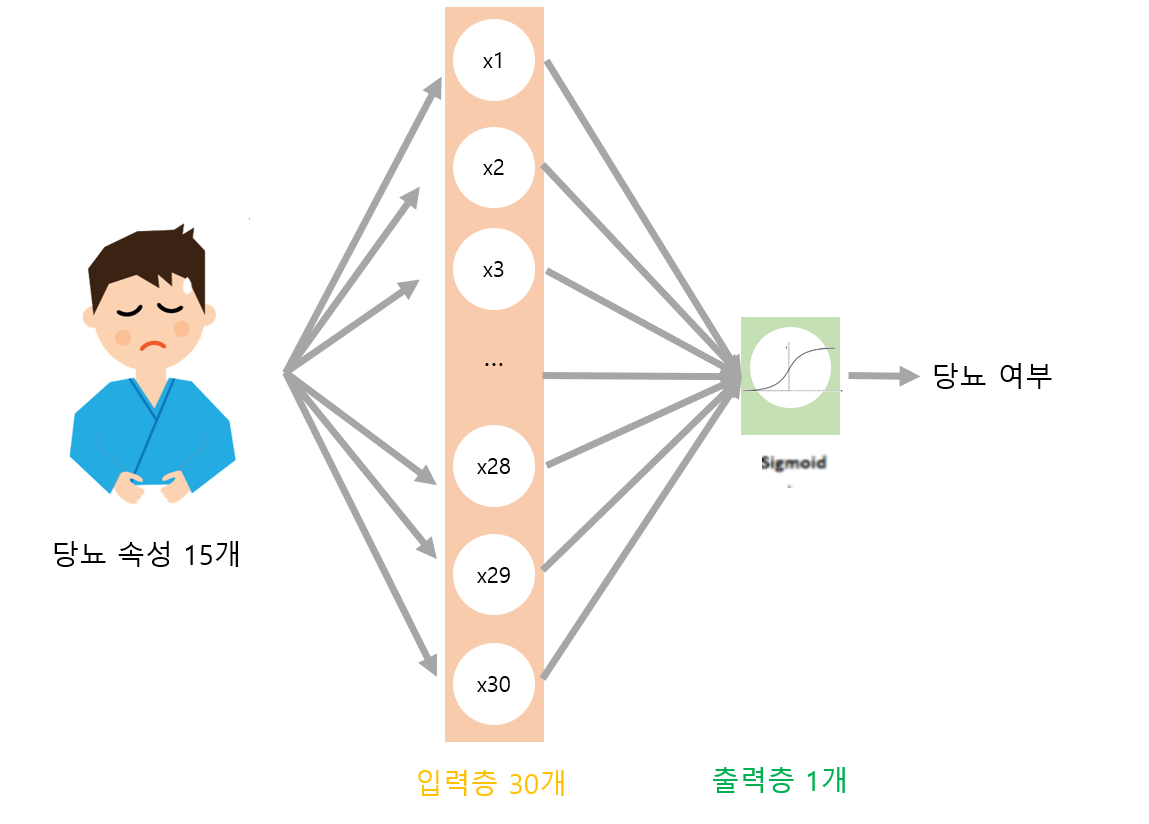

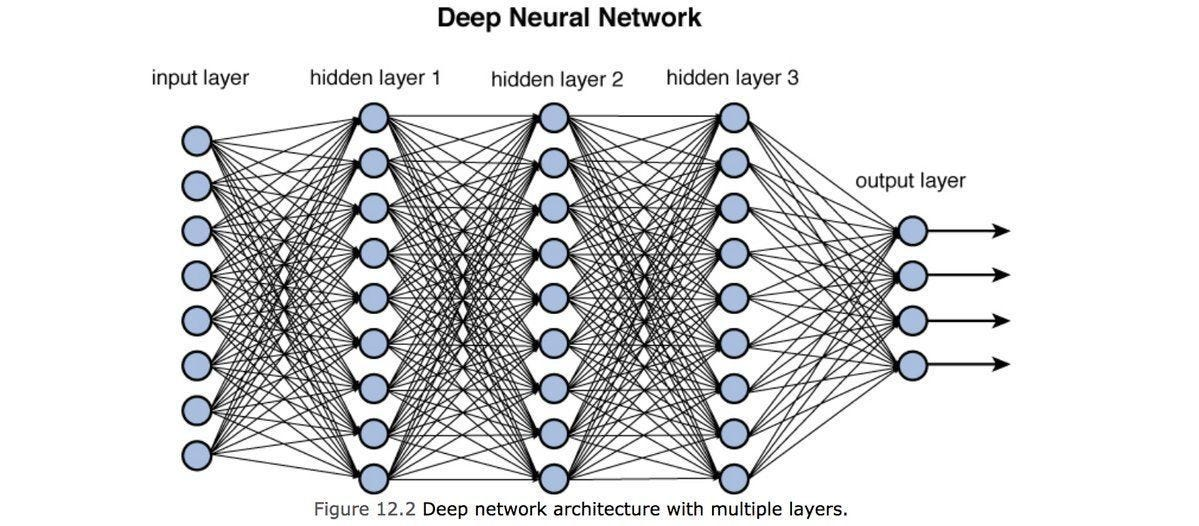

# 3)딥러닝 모델 컴파일
- 오차(loss)는 **이진 교차 엔트로피(binary_crossentropy)**로 구함
- 일반적으로 많이 쓰는 경사하강법 'adam’으로 최적화(optimizer)하고
- 모델의 성능(performance)를 확인하기 위해 정확도(accuracy)를 체크

In [ ]:
#3. 모델 컴파일
model.compile(loss='binary_crossentropy',
      optimizer='adam', metrics=['accuracy'])
#이진 교차 엔트로피(binary_crossentropy) :  이항 분류 시 사용되는 손실 함수
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

# 4)딥러닝 모델 학습
- 컴파일 이후 데이터(train_x, train_y)를 학습시킴
      -> 결과 : 100번 학습을 마친 후 오차(loss)는 0.0398, 정확도(accuracy)는 무려 1.0로 매운 높은 정확도를 보여줌.

In [ ]:
#4. 모델 학습
history = model.fit(train_x, train_y, epochs = 4,
          batch_size = 6, validation_split = 0.25)
# epochs : 학습 횟수
# batch_size : 데이터 소그룹
# validation_split : 검증 데이터 비율 설정

Epoch 1/4
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9721 - loss: 0.1108 - val_accuracy: 0.7912 - val_loss: 0.3887
Epoch 2/4
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9527 - loss: 0.1062 - val_accuracy: 0.7802 - val_loss: 0.4322
Epoch 3/4
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9667 - loss: 0.1098 - val_accuracy: 0.7802 - val_loss: 0.4005
Epoch 4/4
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9834 - loss: 0.0803 - val_accuracy: 0.7802 - val_loss: 0.4154


# 5)딥러닝 모델 검증하기
- 과적합을 막기 위해 학습에 사용하지 않은 테스트 데이터를 활용하여 **검증**해보자
- 검증 그래프를 시각화하면 학습이 진행될수록 정확도가 점점 높아지는 것을 확인할 수 있음.


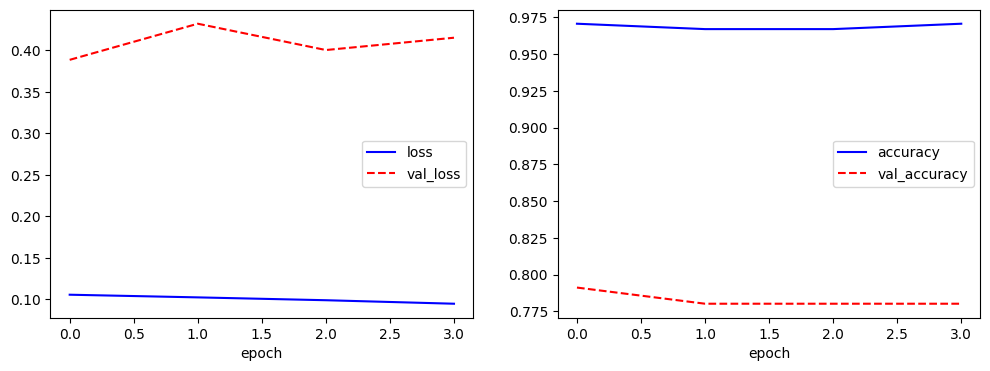

In [ ]:
#5. 검증 그래프 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-', label='accuracy')
plt.plot(history.history['val_accuracy'],'r--',label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 6) 딥러닝 모델 평가하기
- 오차는 0.2387, 정확도는 0.9231로 머신 러닝 모델보다 정확도가 떨어진 것을 확인 할 수 있음.
- 딥러닝이 무조건 좋은 알고리즘이라고 할 수 없으며, **데이터의 특성과 양을 고려해서 최적의 알고리즘으로 학습하는 것이 중요**

In [ ]:
#6. 모델 검증 평가
model.evaluate(test_x, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8613 - loss: 0.2780 


[0.2559080719947815, 0.8846153616905212]

## **더 알아보기**

# 학습 데이터, 평가 데이터, 검증 데이터
- **훈련(학습) 데이터** : 인공지능 알고리즘으로 모델을 학습시키는 재료가 되는 데이터
- **테스트(평가) 데이터** :  학습이 완료 후, 모델을 평가하기 위한 데이터
- **검증 데이터** : 학습 시키는 도중의 정확도를 확인을 위한 데이터
      -> 검증 데이터 비율 설정하기 : .fit(  ) 함수에서 validation_split
      -> 검증 데이터의 오차 확인하기 : .history[‘val_loss’]
      -> 검증 데이터의 정확도 확인하기 : .history[‘val_accuracy’]




**<검증 데이터 VS 테스트 데이터>**
- **테스트 데이터** : 마지막에 모델 평가만 하고 모델에 **영향을 주지 않는다.**
- **검정 데이터** : 중간 평가를 진행하고 이를 바탕으로 모델의 학습을 수정하고 조정하는 등 **영향을 미친다.**
- *실제 낯선 데이터를 적용했을 때 얼마나 잘 예측하는지를 알고 싶다면?*
      -> 훈련 데이터로 측정한 오차와 정확도 보다 검증 데이터로 측정한 오차와 정확도


---


- 검증 데이터 비율 :  .fit(  ) 함수에서 validation_split로 설정
- 검증 데이터의 오차 확인하기 : .history[‘val_loss’]
- 검증 데이터의 정확도 확인하기 : .history[‘val_accuracy’]




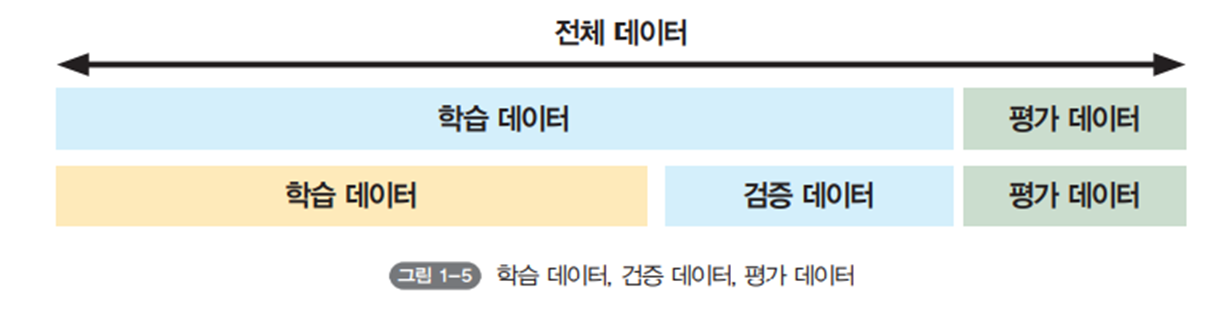

# '1-오차=정확도'라는 착각
- 오차와 정확도는 서로 다른 차원의 개념으로 둘이 합하여 1이 될 수 없다!
  - **오차(loss)**: 실제 값과 예측 값 사이의 차이(거리)
  - **정확도(accuracy)** : 전체 데이터 중 몇 개를 맞혔는가에 대한 전체 평균



## **정리하기**

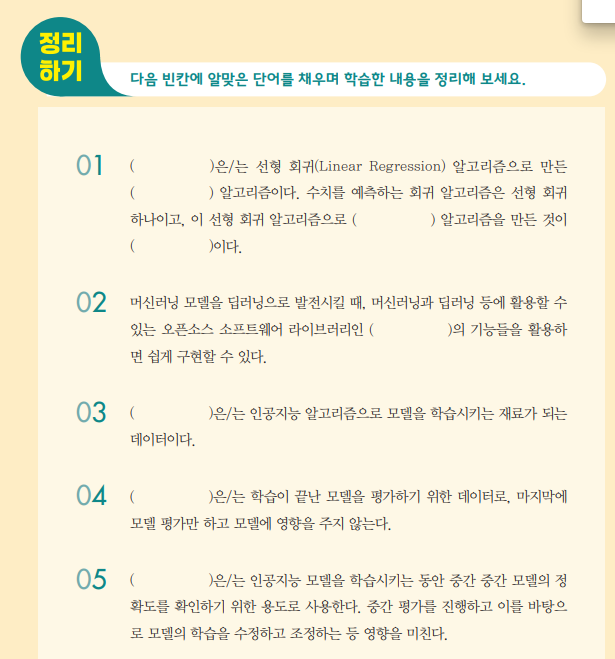